<a href="https://colab.research.google.com/github/divas-jindal/AI_IG/blob/master/Feed_Forward_Neural_Network%2BXOR_(177117).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center> ML Lab Assignment 3 - Feed Forward Neural Network with Backpropagation

**Submitted by :-**

  **Name : Divas Jindal**

  **Roll No. : 177117**
  
  **Class : BTECH 4/4 CSE-A**






### A) Constructing the Neural Network with Back Propagation


In [21]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm

###### **Activation Function**



In [22]:
#A function to apply sigmoid actvation function on an input X
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###### **Predict Function**


In [23]:
#This function predicts the the output for given input and weight vectors and hence returns the accuracy
def predict(X, y, w1, w2, verbose=True, bias=True,show_all=False):
    y_predicted = []
    
    for xi in X:
        h = sigmoid(xi.dot(w1.T))
        if (bias):
            tmp_h = np.append(np.ones(1), h) 
        else:
            tmp_h = h
        op = sigmoid(tmp_h.dot(w2.T))

        # store prediction
        y_predicted.append(op)
    
    # Converting Y and y_predicted back from OH format to 1d array
    # Prediction is the index with highest value in y_prediction hence using argmax
    
    y = np.argmax(y, axis=1)
    y_predicted = np.argmax(y_predicted, axis=1)
                
    # For easier debugging, print the labels for all images
    if show_all:
      for idx,x in enumerate(X):
          print(f"Predicted => {y_predicted[idx]}, Actual => {y[idx]}")
          plt.imshow(x.reshape(28,28))
          plt.show()
    
    # calculate and return accuracy - this is why we had to reconvert back from OH format
    acc = np.mean(y_predicted==y)
    if (verbose):
        print(f"Accuracy => {acc*100}")
    return acc

###### **Backpropagation Function**
A two layer neural network is used with variable number of input, hidden, and output units.

In [24]:
def backpropagation(X, Y, n_hidden_units,lr = 0.2,w_init=None,w_scale=1,epochs=1,batch=False,bias=True):
    if bias:
        ones_column = np.ones((X.shape[0],1))
        X = np.concatenate((ones_column,X), axis=1)
    
    if bias:
      bias_integer = 1
    else:
      bias_integer = 0 #if bias is required, we need to add 1 to weight dimension 
      

    #Initialization of weight values
    
    #if w_init(initial weight values before training) is not specified in function parameters, we randomise the weights to small values
    if w_init is not None:
        w1 = np.ones((n_hidden_units,X.shape[1])) * w_init
        w2 = np.ones((Y.shape[1],n_hidden_units+bias_integer)) * w_init
    # Random weight values when w_init not specified
    else:
        w1 = np.random.uniform(size=(n_hidden_units,X.shape[1])) / w_scale
        w2 = np.random.uniform(size=(Y.shape[1],n_hidden_units+bias_integer)) / w_scale
            
    w1_history_of_weights = []
    w2_history_of_weights = []
    list_of_accuracies = []
    
    # Loop over the number of specified epochs
    for i in tqdm(range(epochs)):
        
        # for each training example in the input dataset
        for index, (x,y) in enumerate(zip(X,Y)):
            # FORWARD PASS
            h = sigmoid(x.dot(w1.T))

            if bias:
                tmp_h = np.append(np.ones(1), h) # Since we do not want to add a bias term to h itself
            else:
                tmp_h = h
            o = sigmoid(tmp_h.dot(w2.T))
            
            #BACKWARD PASS
            do = o*(1-o)*(y-o)
            dh = h * (1-h) * do.dot(w2[:,bias_integer:]) # Skip bias dimension if it exists
            
            ### WEIGHT UPDATIONS
            dw2 = lr * do.reshape(-1,1) * tmp_h
            dw1 = lr * dh.reshape(-1,1) *(x) 

            #If batch=true in function parameters, store history : BATCH UPDATE
            if batch == True:
                w1_history_of_weights.append(dw1)
                w2_history_of_weights.append(dw2)
            
            # If batch=false in function parameters : STOCHASTIC UPDATE
            else:
                # STOCHASTIC WEIGHT UPDATION
                w2 += dw2
                w1 += dw1
                
        # BATCH WEIGHT UPDATION
        if batch is True:
            w1 += sum(w1_history_of_weights)
            w2 += sum(w2_history_of_weights)
            
        # Check accuracy while training
        pre = predict(X,Y,w1,w2,verbose=False,bias=bias)
        list_of_accuracies.append(pre)
        
    return w1, w2, list_of_accuracies

### B) Handwritten Digit Recognition on MNIST Dataset

In [25]:
from tensorflow.python.keras.datasets import mnist

#Importing the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Setting the number of training and testing images
num_train = 1000
num_test = 100

# Training data
X_train = X_train[:num_train]
Y_train = Y_train[:num_train]

# Testing data
X_test = X_test[:num_test]
Y_test = Y_test[:num_test]

# One hot encode the y training vectors
Y_train_OH = np.zeros((Y_train.size, Y_train.max()+1))
Y_train_OH[np.arange(Y_train.size),Y_train] = 1

# One hot encode the y testing vectors
Y_test_OH = np.zeros((Y_test.size, Y_test.max()+1))
Y_test_OH[np.arange(Y_test.size),Y_test] = 1

# Flatten X and is normalized to bring the values into [0,1] range
X_train = X_train.reshape(X_train.shape[0],-1) / 255
X_test = X_test.reshape(X_test.shape[0],-1) / 255

**Visualizing the images in the MNIST dataset**

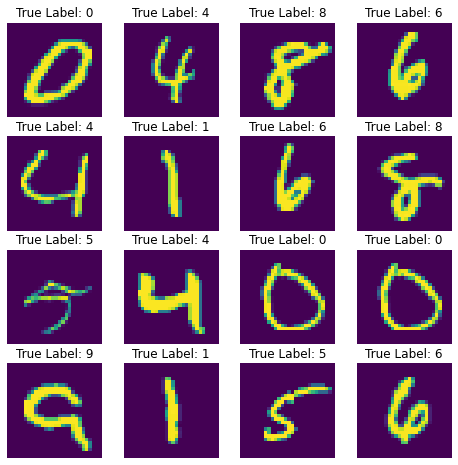

In [26]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # get a random image to show
    plt.title('True Label: '+str(Y_train[r])) # show its label as title
    plt.imshow(X_train[r].reshape(28,28))    # plot the image
plt.show()

**Initializing the input parameters and hyperparameters**

In [27]:
w_scale = 10             # Value to normalize the data with
w_init = None                # Initial weight values
n_hidden_units = 100         # Number of hidden units in hidden layer
lr = 0.01                    # Learning rate
epochs = 500                 # Number of epochs
batch = False                # If set to true, the algorithm uses batch update, otherwise it uses Stochastic update
bias = False


w1,w2,list_of_accuracies = backpropagation(X_train,Y_train_OH,n_hidden_units,lr,w_init,w_scale,epochs,batch,bias)





100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


**Visualization of Performance**

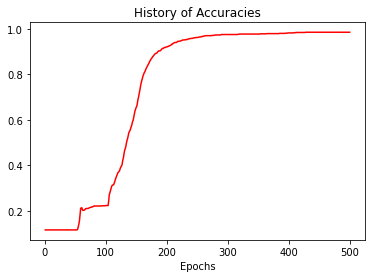

Maximium Accuracy Achieved : 0.985
Test Accuracy => 0.85


In [28]:
# VISUALIZATION OF PERFORMANCE
epochs = np.arange(1, len(list_of_accuracies)+1)
plt.plot(epochs, list_of_accuracies, c='red')
plt.title('History of Accuracies')
plt.xlabel('Epochs')
plt.show()
print(f"Maximium Accuracy Achieved : {max(list_of_accuracies)}")

# Check accuracy on Test dataset
test_acc = predict(X_test,Y_test_OH,w1,w2,bias=False,verbose=False,show_all=False)
print(f"Test Accuracy => {test_acc}")




### C) Handwritten Character Recognition on EMNIST Dataset

###### **Dataset Used -  Characters from EMNIST Dataset** 


The EMNIST dataset is loaded from CSV files. 

1. CSV files have been significantly reduced. 

2. First column - Y values 
3. Rest columns -  image. 
4. EMNIST images are rotated (data augmentation) so the images here may not look exactly like the corresponding letter from all angles.

In [29]:
# Using a pandas dataframe and converting it into a numpy array
train = pd.read_csv("emnist_letters_train_dataset.csv").to_numpy()
test = pd.read_csv("emnist_letters_test_dataset.csv").to_numpy()

# Getting the Xs and Ys
Y_train = train[:,0]
X_train = train[:,1:]
Y_test = test[:,0]
X_test = test[:,1:]

# Convert y vectors to one hot vectors for our network to work
Y_train_OH = np.zeros((Y_train.size, Y_train.max()+1))
Y_train_OH[np.arange(Y_train.size),Y_train] = 1

Y_test_OH = np.zeros((Y_test.size, Y_test.max()+1))
Y_test_OH[np.arange(Y_test.size),Y_test] = 1

# flatten X and bring into [0,1] range
X_train = X_train.reshape(X_train.shape[0],-1) / 255
X_test = X_test.reshape(X_test.shape[0],-1) / 255

**Visualizing the images in the EMNIST dataset**

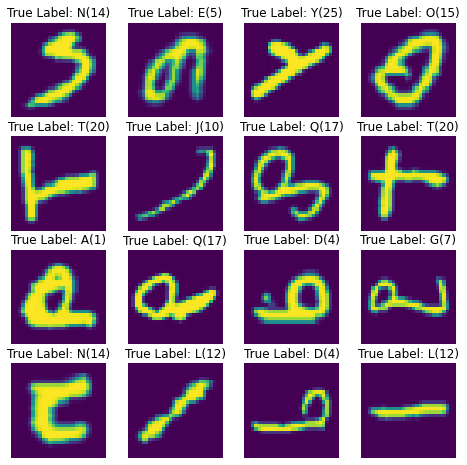

In [30]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # get a random image to show
    plt.title('True Label: '+chr(64 + Y_train[r]) + '('+str(Y_train[r])+')') # show its label as title
    plt.imshow(X_train[r].reshape(28,28))    # plot the image
plt.show()

**Initializing the input parameters and hyperparameters**

In [31]:
w_scale = 10                 # Value to normalize the data with
w_init = None                # Initial weight values
n_hidden_units = 100         # Number of hidden units in hidden layer
lr = 0.01                    # Learning rate
epochs = 500                 # Number of epochs
batch = False                # If set to true, the algorithm uses batch update, otherwise it uses Stochastic update
bias = False


w1,w2,list_of_accuracies = backpropagation(X_train,Y_train_OH,n_hidden_units,lr,w_init,w_scale,epochs,batch,bias)





100%|██████████| 500/500 [12:27<00:00,  1.49s/it]


**Visualization of Performance**

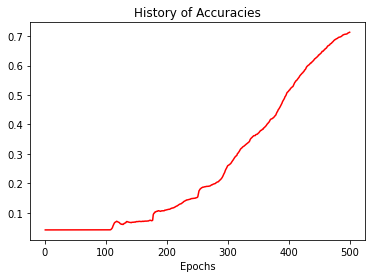

Maximium Accuracy Achieved : 0.7130538209931608
Test Accuracy => 0.34863064396743154


In [32]:
# VISUALIZATION OF PERFORMANCE
epochs = np.arange(1, len(list_of_accuracies)+1)
plt.plot(epochs, list_of_accuracies, c='red')
plt.title('History of Accuracies')
plt.xlabel('Epochs')
plt.show()
print(f"Maximium Accuracy Achieved : {max(list_of_accuracies)}")

# Check accuracy on Test dataset
test_acc = predict(X_test,Y_test_OH,w1,w2,bias=False,verbose=False,show_all=False)
print(f"Test Accuracy => {test_acc}")




### D) Running the Model on XOR Dataset



**Initializing the input parameters and hyperparameters**

In [33]:
w_scale = 1                  # Value to normalize the data with
w_init = None                # Initial weight values
n_hidden_units = 2           # Number of hidden units in hidden layer
lr = 0.1                     # Learning rate
epochs = 10000               # Number of epochs
batch = False                # If set to true, the algorithm uses batch update, otherwise it uses Stochastic update
dataset = np.asarray([[0,0,0], #Dataset (Truth Table)
                [0,1,1], 
                [1,0,1],
                [1,1,0]])

# Getting X and y from the above dataset
X = dataset[:,:2]
y = dataset[:,2:]


#Convert y to one hot encoding (for the network to be general for any number of output units)
y_OH = np.zeros((y.size, y.max()+1))
y_OH[np.arange(y.size),y.reshape(-1)] = 1


# Invoking the backpropagation function.
w1,w2,list_of_accuracies = backpropagation(X,y_OH,n_hidden_units,lr,w_init,w_scale,epochs,batch)




100%|██████████| 10000/10000 [00:02<00:00, 4017.03it/s]


**Visualization of Performance**

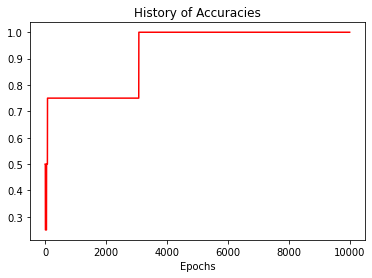

Maximium Accuracy Achieved : 1.0
[[-2.94711226  6.65476437  6.63583169]
 [-7.18975263  4.69670941  4.69201283]] [[ 3.24775687 -7.04399292  7.55758071]
 [-3.25798629  7.06567465 -7.58051364]]


In [34]:
# VISUALIZATION OF PERFORMANCE OF THE MODEL
epochs = np.arange(1, len(list_of_accuracies)+1)
plt.plot(epochs, list_of_accuracies, c='red')
plt.title('History of Accuracies')
plt.xlabel('Epochs')
plt.show()
print(f"Maximium Accuracy Achieved : {max(list_of_accuracies)}")

print(w1,w2)